# A Brief Analysis of We Rate Dogs #

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
tweet_archive_master = pd.read_csv('twitter_archive_master.csv')

When thinking about what information I could pull from the data, these were the three questions I wanted to answer:
1. What does the breakdown of the ratings look like? Is it a normal distribution or are ratings given on a tipped scale?
2. What is the breakdown of breeds? Is there a more common breed?
3. Do the dogs' ratings actually correspond with audience feedback, measured by retweets and favorites?

First, I was curious what the proportion of ratings looked like. Below are the proportions of the frequency of ratings that appear, from 10 to 14. The vast majority are 12 and 13, setting the average around 12.

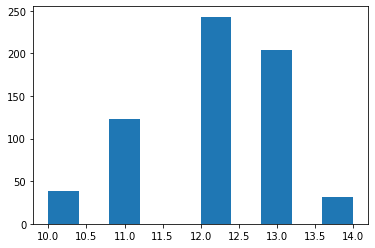

In [3]:
plt.hist(tweet_archive_master.rating_numerator);

This actually does look like a fairly normal distribution, with 12 being about average and 10s and 14s being much more rare.

Second, I was curious what the most common breed was in the data, and if some breeds were specifically more common than others. To do this, I picked some arbitrary criteria that made sense to me, but I filtered the dataframe based on predictions that were above 90% certain and that predicted the photo was of a dog. This ultimately limited me to 107 rows.

In [4]:
confident_dog_data = tweet_archive_master.copy()
confident_dog_data = confident_dog_data[confident_dog_data.p1_conf > 0.9]
confident_dog_data = confident_dog_data[confident_dog_data.p1_dog == True]
confident_dog_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107 entries, 10 to 633
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               107 non-null    int64  
 1   in_reply_to_status_id  0 non-null      float64
 2   in_reply_to_user_id    0 non-null      float64
 3   timestamp              107 non-null    object 
 4   source                 107 non-null    object 
 5   text                   107 non-null    object 
 6   expanded_urls          107 non-null    object 
 7   rating_numerator       107 non-null    int64  
 8   rating_denominator     107 non-null    int64  
 9   name                   107 non-null    object 
 10  retweet_count          107 non-null    int64  
 11  favorite_count         107 non-null    int64  
 12  jpg_url                107 non-null    object 
 13  img_num                107 non-null    int64  
 14  p1                     107 non-null    object 
 15  p1_co

In [5]:
confident_dog_data.groupby('p1').count().tweet_id.sort_values(ascending=False)

p1
golden_retriever                  16
Pembroke                          14
Samoyed                            9
French_bulldog                     7
chow                               6
Labrador_retriever                 5
pug                                4
vizsla                             3
Chihuahua                          3
Pomeranian                         2
Shetland_sheepdog                  2
German_shepherd                    2
basset                             2
Doberman                           2
komondor                           2
Bernese_mountain_dog               2
American_Staffordshire_terrier     2
Old_English_sheepdog               2
Norwegian_elkhound                 1
Gordon_setter                      1
Great_Pyrenees                     1
Brittany_spaniel                   1
Blenheim_spaniel                   1
Italian_greyhound                  1
Leonberg                           1
Rottweiler                         1
Pekinese                           

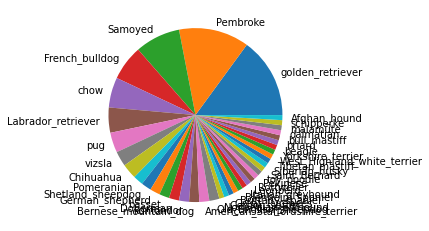

In [6]:
plt.pie(confident_dog_data.groupby('p1').count().tweet_id.sort_values(ascending=False), 
        labels=confident_dog_data.groupby('p1').count().tweet_id.sort_values(ascending=False).index);

Based on this, it initially looks like it is possible that golden retrievers are the dogs that people most frequently find adorable. However, I think a complicating factor is whether or not this just means that the prediction algorithm is better at predicting whether a dog is a golden retriever, whether because it was fed more data with that breed of dog or because there is something visually distinct about them that makes them easier for a computer to analyze.

The third question that occurred to me was whether or not the account's rating system had any correlation with audience feedback. Specifically, did higher rated dogs actually end up getting more favorites and retweets?

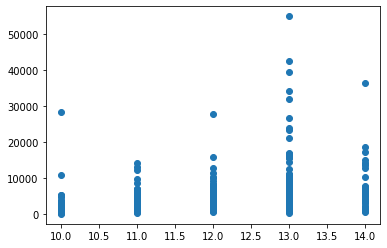

In [7]:
plt.scatter(tweet_archive_master.rating_numerator, tweet_archive_master.retweet_count)

In [8]:
tweet_archive_master.groupby('rating_numerator').retweet_count.mean()

rating_numerator
10    3024.473684
11    3130.878049
12    3546.185185
13    6201.691176
14    8042.906250
Name: retweet_count, dtype: float64

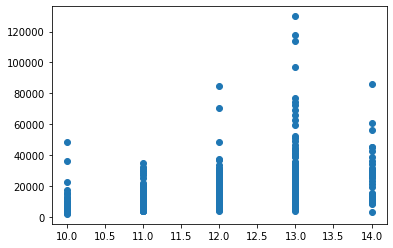

In [9]:
plt.scatter(tweet_archive_master.rating_numerator, tweet_archive_master.favorite_count)

In [10]:
tweet_archive_master.groupby('rating_numerator').favorite_count.mean()

rating_numerator
10     9779.157895
11    11580.739837
12    14953.407407
13    23219.950980
14    27142.656250
Name: favorite_count, dtype: float64

Based on the scatterplots, it initially seems like dogs rated 13 do the best, but when looking at the averages for each group, the audience feedback actually does closely mimic the rating of the dog given by the account. The scatterplot is actually a bit misleading because there are so many more 13 than 14 ratings, which results in more opportunities for those posts to go viral, but on average they still do not perform as well as the dogs rated as 14. I do wonder if this is because the account is good at identifying the better posts, or if people see the higher ratings and then give the post more consideration as a result.